In [2]:
import pandas as pd
from pandas import Series,DataFrame
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

In [323]:
시간대별이용객 = pd.read_excel('subway/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.xls',encoding='utf8')

In [324]:
시간대별이용객.head()

사용월  호선명         지하철역  04시-05시 승차인원  04시-05시 하차인원  05시-06시 승차인원  \
0  201804  중앙선           도농           462             1          6788   
1  201804  중앙선           구리           550             5          8949   
2  201804  중앙선           양원            14             1          1586   
3  201804  중앙선           망우           204             9          7088   
4  201804  중앙선  상봉(시외버스터미널)           493             5          5878   

   05시-06시 하차인원  06시-07시 승차인원  06시-07시 하차인원  07시-08시 승차인원    ...     \
0          1433         17947          4570         47553    ...      
1          1675         21043          6481         62328    ...      
2           120          2449          2047          6514    ...      
3           677         13231          3637         33486    ...      
4           839          9190          3134         23691    ...      

   23시-24시 하차인원  00시-01시 승차인원  00시-01시 하차인원  01시-02시 승차인원  01시-02시 하차인원  \
0         12450           184          4777             0             0   
1         18686           284          4516             0             0   
2          1259            15           278             0             0   
3          8912           103          2057             0             0   
4          7154           230          2273             0             0   

   02시-03시 승차인원  02시-03시 하차인원  03시-04시 승차인원  03시-04시 하차인원      작업일자  
0             0             0             0             0  20180503  
1             0             0             0             0  20180503  
2             0             0             0             0  20180503  
3             0             0             0             0  20180503  
4             0             0             0             0  20180503  

[5 rows x 52 columns]

In [325]:
#수집한 데이터의 가장 최근에 정리된 2018년 4월의 지하철 이용객을 기준으로 분석을 하기위해서 데이터를 분리
april_2018 = 시간대별이용객[시간대별이용객['사용월']==201804]

In [326]:
역이름 = april_2018['지하철역']

In [327]:
#인덱스를 지하철역이름으로 설정
april_2018 = april_2018.reset_index().set_index(역이름)

In [328]:
april_2018

index     사용월    호선명          지하철역  04시-05시 승차인원  04시-05시 하차인원  \
지하철역                                                                           
도농                0  201804    중앙선            도농           462             1   
구리                1  201804    중앙선            구리           550             5   
양원                2  201804    중앙선            양원            14             1   
망우                3  201804    중앙선            망우           204             9   
상봉(시외버스터미널)       4  201804    중앙선   상봉(시외버스터미널)           493             5   
중랑                5  201804    중앙선            중랑            63             2   
회기                6  201804    중앙선            회기           635             7   
신창(순천향대)          7  201804    장항선      신창(순천향대)            14             1   
온양온천              8  201804    장항선          온양온천             2             0   
배방                9  201804    장항선            배방             2             0   
아산               10  201804    장항선            아산             7             0   
쌍용(나사렛대)         11  201804    장항선      쌍용(나사렛대)             4             2   
봉명               12  201804    장항선            봉명             4             0   
대화               13  201804    일산선            대화           184             2   
주엽               14  201804    일산선            주엽            71             3   
정발산              15  201804    일산선           정발산            55             1   
마두               16  201804    일산선            마두            26             0   
백석               17  201804    일산선            백석            50             0   
대곡               18  201804    일산선            대곡            18             0   
화정               19  201804    일산선            화정           146             2   
원당               20  201804    일산선            원당           147             7   
삼송               21  201804    일산선            삼송           568             3   
지축               22  201804    일산선            지축             0             0   
원흥               23  201804    일산선            원흥           119             0   
신설동              24  201804  우이신설선           신설동             9             0   
보문               25  201804  우이신설선            보문             1             0   
성신여대입구(돈암)       26  201804  우이신설선    성신여대입구(돈암)             4             1   
정릉               27  201804  우이신설선            정릉             2             1   
북한산보국문           28  201804  우이신설선        북한산보국문             8             2   
솔샘               29  201804  우이신설선            솔샘             2             2   
...             ...     ...    ...           ...           ...           ...   
왕십리(성동구청)       560  201804    2호선     왕십리(성동구청)           622             4   
상왕십리            561  201804    2호선          상왕십리            32             4   
신당              562  201804    2호선            신당            67             0   
동대문역사문화공원       563  201804    2호선     동대문역사문화공원           326             3   
을지로4가           564  201804    2호선         을지로4가             4             0   
을지로3가           565  201804    2호선         을지로3가             8             0   
을지로입구           566  201804    2호선         을지로입구           116             9   
시청              567  201804    2호선            시청            84             4   
동묘앞             568  201804    1호선           동묘앞           102             3   
청량리(서울시립대입구)    569  201804    1호선  청량리(서울시립대입구)          1236            39   
제기동             570  201804    1호선           제기동           386             4   
신설동             571  201804    1호선           신설동           253            12   
동대문             572  201804    1호선           동대문           635             7   
종로5가            573  201804    1호선          종로5가            64             2   
종로3가            574  201804    1호선          종로3가           139            11   
종각              575  201804    1호선            종각            89             0   
시청              576  201804    1호선            시청            78             1   
서울역           

In [329]:
#필요하지 않은 인덱스 삭제 --> 이 방법 말고 더 효율적인 방법을 물어보고 적용
del april_2018['index']
del april_2018['사용월']
del april_2018['작업일자']

In [330]:
april_2018.iloc[:,4:50]

05시-06시 승차인원  05시-06시 하차인원  06시-07시 승차인원  06시-07시 하차인원  \
지하철역                                                                   
도농                    6788          1433         17947          4570   
구리                    8949          1675         21043          6481   
양원                    1586           120          2449          2047   
망우                    7088           677         13231          3637   
상봉(시외버스터미널)           5878           839          9190          3134   
중랑                    5824           675         10990          2376   
회기                   11378          4061         24178         14029   
신창(순천향대)               821            73          1441           377   
온양온천                  1631           798          4845          2815   
배방                     624           101          1675           738   
아산                     477           548          1999          2889   
쌍용(나사렛대)              1393           233          4093           811   
봉명                     807           310          1646          1036   
대화                    6669          1707         27917          6972   
주엽                    4952          1407         17368          4694   
정발산                   2351          1335          5625          4090   
마두                    3267          1750         10642          5809   
백석                    4529          2708         12550          7722   
대곡                     781           425          2618          1044   
화정                   11469          1689         26845          7661   
원당                   10883          1301         22762          6911   
삼송                    7098          1421         23075         15038   
지축                       0             0             0             0   
원흥                    4987           694         13268          7012   
신설동                    381           379           593          1291   
보문                     412           138           869          1017   
성신여대입구(돈암)             708           378          1442          1345   
정릉                    1642           538          5220          1885   
북한산보국문                1783           394          6897          2533   
솔샘                    2354           247          9167          1306   
...                    ...           ...           ...           ...   
왕십리(성동구청)             8046          1296         12570          7769   
상왕십리                  5944          1188         15061          5326   
신당                    6809          1466         13993         11013   
동대문역사문화공원            11740          1135          7592         11787   
을지로4가                  926          1069          1840         12772   
을지로3가                 1146          1669          2721         17289   
을지로입구                 3343          4217          3816         39663   
시청                    1361          1847          2436         19182   
동묘앞                   3566           892          4173          3673   
청량리(서울시립대입구)         12858          4020         20126         14704   
제기동                   5105          2336         10305          9103   
신설동                   8867          2419         11396          8091   
동대문                  15415          2276         12939          9075   
종로5가                  2236          3682          3176         17695   
종로3가                  5563          2637          4355         12815   
종각                    4218          5091          5191         32394   
시청                    2314          4402          3833         26295   
서울역                  11558          9091         15423         58120   
원덕                     386            15           714           146   
양평                    1651           132          3201          2414   
오빈                     236            13           678           234   
아신                     485            11          1114           272   
국수                     543            59          1403

In [331]:
#역별로 승,하차를 했던 모든 인원의 총 합이 이용한 인원의 수가 됨
april_2018['총이용인원'] = april_2018.iloc[:,4:50].sum(axis=1)

In [668]:
백만이상 = april_2018[april_2018['총이용인원']>=1000000]

호선명          지하철역  04시-05시 승차인원  04시-05시 하차인원  05시-06시 승차인원  \
지하철역                                                                        
회기            중앙선            회기           635             7         11378   
화정            일산선            화정           146             2         11469   
중앙            안산선            중앙           238            22          8097   
상록수           안산선           상록수           430            23         15945   
산본            안산선            산본           389             3          9157   
죽전            분당선            죽전          1348             6          4539   
미금            분당선            미금           602             8          5231   
정자            분당선            정자           357             4          3569   
서현            분당선            서현           405            17          5694   
야탑            분당선            야탑           201             7          8342   
모란            분당선            모란           194             6         14574   
압구정로데오        분당선        압구정로데오            60             0          1747   
범계            과천선            범계           151            37          8415   
평촌            과천선            평촌            31             4          4423   
인덕원           과천선           인덕원           138             3          8876   
동인천           경인선           동인천          4933            21         10976   
주안            경인선            주안          1181            10         16368   
동암            경인선            동암           525             6         22501   
부평            경인선            부평          6095            58         27105   
송내            경인선            송내          1265             7         18855   
부천            경인선            부천          1787            15         37408   
역곡            경인선            역곡           559            12         27430   
개봉            경인선            개봉          1334             6         19777   
의정부           경원선           의정부          2468             9         11448   
청량리(서울시립대입구)  경원선  청량리(서울시립대입구)          1303             6          6318   
왕십리(성동구청)     경원선     왕십리(성동구청)           726            16          5654   
병점            경부선            병점          2366            17          7323   
독산            경부선            독산           766             6          7375   
수원            경부선            수원          1519            47         22612   
성균관대          경부선          성균관대            85             3          8456   
...           ...           ...           ...           ...           ...   
낙성대           2호선           낙성대            89             4         12326   
사당            2호선            사당            93             1         13365   
방배            2호선            방배            13             0          3354   
서초            2호선            서초             2             0          1282   
교대(법원.검찰청)    2호선    교대(법원.검찰청)             9             0          3081   
강남            2호선            강남           282             8         14398   
역삼            2호선            역삼            45             1          4038   
선릉            2호선            선릉           145             2          6375   
삼성(무역센터)      2호선      삼성(무역센터)           171             0          5443   
종합운동장         2호선         종합운동장            16             0          2969   
잠실새내          2호선          잠실새내            49             3          6584   
잠실(송파구청)      2호선      잠실(송파구청)           114             4         14644   
잠실나루          2호선          잠실나루             8             1          3208   
강변(동서울터미널)    2호선    강변(동서울터미널)            21             1         10420   
구의(광진구청)      2호선      구의(광진구청)            55             1         13915   
건대입구          2호선          건대입구           282            12         21338   
성수            2호선            성수            32             0          5634   
뚝섬            2호선            뚝섬            18             0          4512   
왕십리(성동구청)     2호선     왕십리(성동구청)           622             4          8046   
동대문역사문화공원 

In [332]:
#2018년 4월 가장 이동한 인원이 많았던 상위 5개의 역 추출
april_2018['총이용인원'].sort_values(ascending=False).head()

지하철역
강남          6097548
잠실(송파구청)    5520887
홍대입구        4893483
신림          4287081
구로디지털단지     3852537
Name: 총이용인원, dtype: int64

<IPython.core.display.Javascript object>


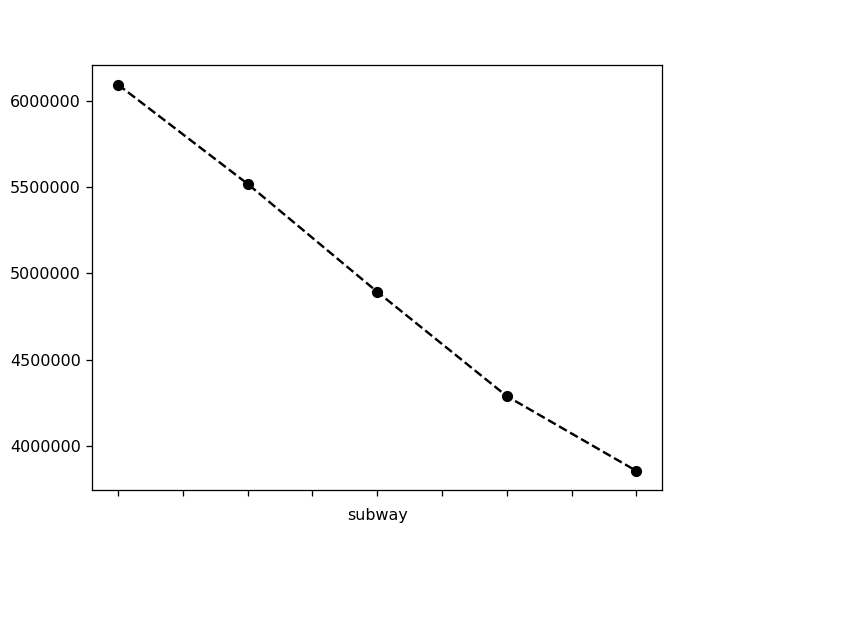

In [333]:
d = april_2018['총이용인원'].sort_values(ascending=False).head()
graph1 = d.plot(color = 'k', linestyle = '--', marker = 'o') 

In [14]:
graph1.set_title("subway total user") 

Text(0.5,1,'subway total user')

In [334]:
graph1.set_ylabel("user num")

Text(3.55555,0.5,'user num')

In [335]:
graph1.set_xlabel("subway")

Text(0.5,43.1506,'subway')

In [336]:
#데이터 확인을 위한 엑셀파일 1차 저장
april_2018.to_excel('subway/anal_v1.xls')

In [337]:
#또 다른 엑셀파일 read
역별시설물=pd.read_excel('subway/서울시 역코드로 지하철역 정보 검색.xls')

In [338]:
역별시설물[:10]

전철역코드     전철역명                       전철역명_영문  호선  외부코드  사이버스테이션     관리소코드  \
0   4703  419민주묘지  April 19th National Cemetery  UI   943     4703       NaN   
1   1907       가능                       Ganeung   1   109     1907  410000.0   
2    340     가락시장                  Garak Market   3   350     2818  133400.0   
3   2818     가락시장                  Garak Market   8   817     2818  350700.0   
4   1702  가산디지털단지         Gasan Digital Complex   1  P142     1702  410000.0   
5   2748  가산디지털단지         Gasan Digital Complex   7   746     1702  350650.0   
6   4107       가양                        Gayang   9   907     4107  410000.0   
7   4704      가오리                         Gaori  UI   944     4704       NaN   
8   3216      가재울                       Gajaeul  I2  I216     3216       NaN   
9   3211       가정             Gajeong(Lu1 City)  I2  I211     3211       NaN   

      관리소명                  개통일          전화번호     ...     에스컬레이터  휠체어리프트시설  \
0      NaN                  NaN           NaN     ...        NaN       NaN   
1    철도청구간                  NaN  031-828-3249     ...        NaN       NaN   
2  도곡서비스센터  2010-02-18 00:00:00  02-6311-8171     ...          Y         N   
3  잠실역무관리소   2004-6-22 16:57:55  02-6311-8171     ...        NaN       NaN   
4    철도청구간                  NaN  02-2639-3332     ...        NaN       NaN   
5  광명역무관리소  2000-02-29 00:00:00  02-6311-7461     ...        NaN       NaN   
6    9호선구간            2009-7-24  02-2656-0907     ...          N         N   
7      NaN                  NaN           NaN     ...        NaN       NaN   
8      NaN           2016-07-30  032-451-4316     ...        NaN       NaN   
9      NaN           2016-07-30  032-451-4311     ...        NaN       NaN   

  스피드게이트        화장실     역명한자  \
0    NaN        NaN      NaN   
1    NaN     게이트 외부       佳陵   
2      N  게이트 내부,외부     可樂市場   
3    NaN     게이트 외부     可樂市場   
4    NaN     게이트 외부  加山디지털團地   
5    NaN     게이트 외부  加山디지털團地   
6      N     게이트 외부       加陽   
7    NaN        NaN      NaN   
8    NaN        NaN      NaN   
9    NaN        NaN  佳亭(樓苑城)   

                                                  유래       X좌표        Y좌표  \
0                                                NaN       NaN        NaN   
1        각 대신들이 이곳에서 정무를 논의하였다 하여 의정부라는 지명이 생성된데서 유래  509550.0  1179510.0   
2  ○ 가락동은 조선시대 가락골을 중심으로 띄엄띄엄 마을이 있어 자연부락 이름으로 불리...  525992.0  1108579.0   
3  ○ 가락동은 조선시대 가락골을 중심으로 띄엄띄엄 마을이 있어 자연부락 이름으로 불리...  525992.0  1108579.0   
4  역이 위치한 행정구역명과 서울디지털산업단지가 입지한 지역특성 감안하여 2005년 7...  473861.0  1105307.0   
5  역이 위치한 행정구역명과 서울디지털산업단지가 입지한 지역특성 감안하여 2005년 7...  473861.0  1105307.0   
6                                     역명은 동명에서 유래했다.  467700.0  1127500.0   
7                                                NaN       NaN        NaN   
8  ○ 가재울은 가재리(佳載里)의 한자로 표기하기 전에 사용하던 명칭이었다. 맑은 시내...       NaN        NaN   
9  ○ 루원시티(Lu1 City)는 인천광역시 서구 가정동에 개발할 신도시재생사업이며,...       NaN        NaN   

    X좌표(WGS)    Y좌표(WGS)  
0        NaN         NaN  
1  37.748577  127.044213  
2  37.492522  127.118234  
3  37.492522  127.118234  
4  37.481072  126.882343  
5  37.481072  126.882343  
6  37.561391  126.854456  
7        NaN         NaN  
8  37.484192  126.683673  
9  37.524649  126.675539  

[10 rows x 35 columns]

In [339]:
#del 역별시설물['유래']
#del 역별시설물['역명한자']
#del 역별시설물['주소']
#del 역별시설물['개통일']
#del 역별시설물['전철역명_영문']
역별시설물

전철역코드     전철역명                       전철역명_영문  호선  외부코드  사이버스테이션  \
0     4703  419민주묘지  April 19th National Cemetery  UI   943     4703   
1     1907       가능                       Ganeung   1   109     1907   
2      340     가락시장                  Garak Market   3   350     2818   
3     2818     가락시장                  Garak Market   8   817     2818   
4     1702  가산디지털단지         Gasan Digital Complex   1  P142     1702   
5     2748  가산디지털단지         Gasan Digital Complex   7   746     1702   
6     4107       가양                        Gayang   9   907     4107   
7     4704      가오리                         Gaori  UI   944     4704   
8     3216      가재울                       Gajaeul  I2  I216     3216   
9     3211       가정             Gajeong(Lu1 City)  I2  I211     3211   
10    3212   가정중앙시장        Gajeong Jungang Market  I2  I212     3212   
11    1265       가좌                         Gajwa   K  K315     1265   
12    1851      가천대                  Gachon Univ.   B  K223     1851   
13    1323       가평                      Gapyeong   G  P134     1323   
14    1816       간석                       Ganseok   1   155     1816   
15    3123    간석오거리                 Ganseogogeori   I  I123     3123   
16    1312       갈매                        Galmae   G  P123     1312   
17    3117       갈산                        Galsan   I  I117     3117   
18     222       강남                       Gangnam   2   222      222   
19    4307       강남                       Gangnam   S    D7      222   
20    2732     강남구청             Gangnam-gu Office   7   730     2732   
21    1849     강남구청             Gangnam-Gu Office   B  K213     2732   
22    4502      강남대                 Kangnam Univ.   E  Y111     4502   
23    2549       강동                      Gangdong   5   548     2549   
24    2813     강동구청            Gangdong-gu Office   8   812     2813   
25    1269       강매                       Gangmae   K  K319     1269   
26     214       강변                     Gangbyeon   2   214      214   
27    1326       강촌                      Gangchon   G  P137     1326   
28    2559       개롱                       Gaerong   5  P553     2559   
29    1801       개봉                       Gaebong   1   143     1801   
..     ...      ...                           ...  ..   ...      ...   
665    419    한성대입구                 Hansung Univ.   4   419      419   
666    209      한양대                 Hanyang Univ.   2   209      209   
667   1024       한티                         Hanti   B  k216     1024   
668   2623       합정                      Hapjeong   6   622      238   
669    238       합정                      Hapjeong   2   238      238   
670   2540       행당                     Haengdang   5   539     2540   
671   1270       행신                      Haengsin   K  K320     1270   
672    420       혜화                        Hyehwa   4   420      420   
673   1882      호구포                        Hogupo  SU  K255     1882   
674    239     홍대입구                  Hongik Univ.   2   239      239   
675   1293     홍대입구                  Hongik Univ.   A   A03      239   
676   1264     홍대입구                   Hongik.Univ   K  K314      239   
677    314       홍제                        Hongje   3   324      314   
678   4705       화계                        Hwagye  UI   945     4705   
679   2518       화곡                        Hwagok   5   517     2518   
680   2647      화랑대                    Hwarangdae   6   646     2647   
681   1712       화서                        Hwaseo   1  P154     1712   
682   1268       화전                       Hwajeon   K  K318     1268   
683   1952       화정                      Hwajeong   3   316     1952   
684   1200       회기                         Hoegi   K  K118     1015   
685   1015       회기                         Hoegi   1   123     1015   
686   1306       회기                         Hoegi   G  P117     1015   
687   1905       회룡                      Hoeryong   1   111     1905   
688   4602       회룡                      Hoer

In [340]:
역별시설물.drop_duplicates()

전철역코드     전철역명                       전철역명_영문  호선  외부코드  사이버스테이션  \
0     4703  419민주묘지  April 19th National Cemetery  UI   943     4703   
1     1907       가능                       Ganeung   1   109     1907   
2      340     가락시장                  Garak Market   3   350     2818   
3     2818     가락시장                  Garak Market   8   817     2818   
4     1702  가산디지털단지         Gasan Digital Complex   1  P142     1702   
5     2748  가산디지털단지         Gasan Digital Complex   7   746     1702   
6     4107       가양                        Gayang   9   907     4107   
7     4704      가오리                         Gaori  UI   944     4704   
8     3216      가재울                       Gajaeul  I2  I216     3216   
9     3211       가정             Gajeong(Lu1 City)  I2  I211     3211   
10    3212   가정중앙시장        Gajeong Jungang Market  I2  I212     3212   
11    1265       가좌                         Gajwa   K  K315     1265   
12    1851      가천대                  Gachon Univ.   B  K223     1851   
13    1323       가평                      Gapyeong   G  P134     1323   
14    1816       간석                       Ganseok   1   155     1816   
15    3123    간석오거리                 Ganseogogeori   I  I123     3123   
16    1312       갈매                        Galmae   G  P123     1312   
17    3117       갈산                        Galsan   I  I117     3117   
18     222       강남                       Gangnam   2   222      222   
19    4307       강남                       Gangnam   S    D7      222   
20    2732     강남구청             Gangnam-gu Office   7   730     2732   
21    1849     강남구청             Gangnam-Gu Office   B  K213     2732   
22    4502      강남대                 Kangnam Univ.   E  Y111     4502   
23    2549       강동                      Gangdong   5   548     2549   
24    2813     강동구청            Gangdong-gu Office   8   812     2813   
25    1269       강매                       Gangmae   K  K319     1269   
26     214       강변                     Gangbyeon   2   214      214   
27    1326       강촌                      Gangchon   G  P137     1326   
28    2559       개롱                       Gaerong   5  P553     2559   
29    1801       개봉                       Gaebong   1   143     1801   
..     ...      ...                           ...  ..   ...      ...   
665    419    한성대입구                 Hansung Univ.   4   419      419   
666    209      한양대                 Hanyang Univ.   2   209      209   
667   1024       한티                         Hanti   B  k216     1024   
668   2623       합정                      Hapjeong   6   622      238   
669    238       합정                      Hapjeong   2   238      238   
670   2540       행당                     Haengdang   5   539     2540   
671   1270       행신                      Haengsin   K  K320     1270   
672    420       혜화                        Hyehwa   4   420      420   
673   1882      호구포                        Hogupo  SU  K255     1882   
674    239     홍대입구                  Hongik Univ.   2   239      239   
675   1293     홍대입구                  Hongik Univ.   A   A03      239   
676   1264     홍대입구                   Hongik.Univ   K  K314      239   
677    314       홍제                        Hongje   3   324      314   
678   4705       화계                        Hwagye  UI   945     4705   
679   2518       화곡                        Hwagok   5   517     2518   
680   2647      화랑대                    Hwarangdae   6   646     2647   
681   1712       화서                        Hwaseo   1  P154     1712   
682   1268       화전                       Hwajeon   K  K318     1268   
683   1952       화정                      Hwajeong   3   316     1952   
684   1200       회기                         Hoegi   K  K118     1015   
685   1015       회기                         Hoegi   1   123     1015   
686   1306       회기                         Hoegi   G  P117     1015   
687   1905       회룡                      Hoeryong   1   111     1905   
688   4602       회룡                      Hoer

In [627]:
강남 = 역별시설물[역별시설물['전철역명']=='강남']
강남역좌표 = 강남[['전철역명','X좌표(WGS)','Y좌표(WGS)']]
강남역좌표 = 강남역좌표[:1]
강남역좌표

전철역명   X좌표(WGS)    Y좌표(WGS)
18   강남  37.497175  127.027926

In [628]:
잠실 = 역별시설물[역별시설물['전철역명']=='잠실']
잠실역좌표 = 잠실[['전철역명','X좌표(WGS)','Y좌표(WGS)']]
잠실역좌표 = 잠실역좌표[:1]
잠실역좌표

전철역명  X좌표(WGS)    Y좌표(WGS)
564   잠실  37.51395  127.102234

In [629]:
홍대입구 = 역별시설물[역별시설물['전철역명']=='홍대입구']
홍대입구역좌표 = 홍대입구[['전철역명','X좌표(WGS)','Y좌표(WGS)']]
홍대입구역좌표 = 홍대입구역좌표[:1]
홍대입구역좌표

전철역명   X좌표(WGS)    Y좌표(WGS)
674  홍대입구  37.557192  126.925381

In [630]:
신림 = 역별시설물[역별시설물['전철역명']=='신림']
신림역좌표 = 신림[['전철역명','X좌표(WGS)','Y좌표(WGS)']]
신림역좌표 = 신림역좌표[:1]
신림역좌표

전철역명   X좌표(WGS)    Y좌표(WGS)
412   신림  37.484201  126.929715

In [631]:
구로디지털단지 = 역별시설물[역별시설물['전철역명']=='구로디지털단지']
구로디지털단지역좌표 = 구로디지털단지[['전철역명','X좌표(WGS)','Y좌표(WGS)']]
구로디지털단지역좌표 = 구로디지털단지역좌표[:1]
구로디지털단지역좌표

전철역명   X좌표(WGS)    Y좌표(WGS)
82  구로디지털단지  37.485266  126.901401

In [632]:
주요5개역좌표 = pd.concat([강남역좌표,잠실역좌표,홍대입구역좌표,신림역좌표,구로디지털단지역좌표],axis=0)

In [633]:
주요5개역좌표

전철역명   X좌표(WGS)    Y좌표(WGS)
18        강남  37.497175  127.027926
564       잠실  37.513950  127.102234
674     홍대입구  37.557192  126.925381
412       신림  37.484201  126.929715
82   구로디지털단지  37.485266  126.901401

In [348]:
전철역리스트 = 역별시설물['전철역명'].drop_duplicates()

In [349]:
#역코드를 기준으로 주변 정류장 open Api 불러오기
import requests
#http://swopenAPI.seoul.go.kr/api/subway/516b71554e77696b37307545517359/xml/busStation/0/5/서울 
#http://swopenAPI.seoul.go.kr/api/subway/(인증키)/xml/busStation/0/5/서울 
import requests
url = 'http://swopenAPI.seoul.go.kr'
a = 'api'
subway = 'subway'
api_key = '516b71554e77696b37307545517359'
return_format = 'json'
service_id = 'busStation'
start_idx = 1
end_idx = 300
#b='강남' ,'잠실','홍대입구','신림','구로디지털단지'
#openapi 데이터 특성상 join 제일 끝에 붙은 문자열로 주변 정류장을 검색하는 api여서 변수를 하나씩 바꿔가면서 저장했습니다.
b = '구로디지털단지'

request_url = '/'.join([url,a,subway, api_key,return_format,service_id,str(start_idx),str(end_idx),b])
response = requests.get(request_url)

In [350]:
bus_json = response.json()

In [351]:
버스api = DataFrame(bus_json['busList'])

In [352]:
버스api

allctintn beginRow busid cfrBuild curPage ectrcCnt ectrcId ectrcNo endRow  \
0       None     None  None     None    None     None    None       1   None   
1       None     None  None     None    None     None    None       1   None   
2       None     None  None     None    None     None    None       1   None   
3       None     None  None     None    None     None    None       1   None   
4       None     None  None     None    None     None    None       1   None   
5       None     None  None     None    None     None    None       1   None   
6       None     None  None     None    None     None    None       1   None   
7       None     None  None     None    None     None    None       2   None   
8       None     None  None     None    None     None    None       2   None   
9       None     None  None     None    None     None    None       2   None   
10      None     None  None     None    None     None    None       2   None   
11      None     None  None     None    None     None    None       3   None   
12      None     None  None     None    None     None    None       3   None   
13      None     None  None     None    None     None    None       4   None   
14      None     None  None     None    None     None    None       4   None   
15      None     None  None     None    None     None    None       5   None   
16      None     None  None     None    None     None    None       5   None   
17      None     None  None     None    None     None    None       6   None   
18      None     None  None     None    None     None    None       6   None   
19      None     None  None     None    None     None    None       6   None   
20      None     None  None     None    None     None    None       6   None   
21      None     None  None     None    None     None    None       6   None   
22      None     None  None     None    None     None    None       6   None   

   fstallctm     ...      statnNm stnuid stnuseyn     sttnId        sttnnm  \
0       None     ...      구로디지털단지   None     None  116000014  구로디지털단지역환승센터   
1       None     ...      구로디지털단지   None     None  116000138      구로디지털단지역   
2       None     ...      구로디지털단지   None     None  116000372  구로디지털단지역환승센터   
3       None     ...      구로디지털단지   None     None  120000001      구로디지털단지역   
4       None     ...      구로디지털단지   None     None  120000146      구로디지털단지역   
5       None     ...      구로디지털단지   None     None  120000440      구로디지털단지역   
6       None     ...      구로디지털단지   None     None  120000441      구로디지털단지역   
7       None     ...      구로디지털단지   None     None  116000014  구로디지털단지역환승센터   
8       None     ...      구로디지털단지   None     None  116000138      구로디지털단지역   
9       None     ...      구로디지털단지   None     None  116000372  구로디지털단지역환승센터   
10      None     ...      구로디지털단지   None     None  120000001      구로디지털단지역   
11      None     ...      구로디지털단지   None     None  116000014  구로디지털단지역환승센터   
12      None     ...      구로디지털단지   None     None  116000372  구로디지털단지역환승센터   
13      None     ...      구로디지털단지   None     None  116000014  구로디지털단지역환승센터   
14      None     ...      구로디지털단지   None     None  116000372  구로디지털단지역환승센터   
15      None     ...      구로디지털단지   None     None  116000014  구로디지털단지역환승센터   
16      None     ...      구로디지털단지   None     None  116000372  구로디지털단지역환승센터   
17      None     ...      구로디지털단지   None     None  116000014  구로디지털단지역환승센터   
18      None     ...      구로디지털단지   None     None  116000372  구로디지털단지역환승센터   
19      None     ...      구로디지털단지   None     None  120000001      구로디지털단지역   
20      None     ...      구로디지털단지   None     None  120000146      구로디지털단지역   
21      None     ...      구로디지털단지   None     None  120000440      구로디지털단지역   
22      None     ...      구로디지털단지   None     None  120000441      구로디지털단지역   

   subwayId subwayNm subwayXcnts subwayYcnts  totalCount  
0      1002      2호선    191335.2    442811.4          23  
1      1002      2호선      191302      442682          23  
2      1002      2호선    191338.6

In [353]:
#모든 데이터에서 빈 컬럼들을 제외하고 데이터가 들어있는 컬럼만 중복을 제거하여 저장
구로디지털단지역버스정류장=버스api.iloc[:,24:].drop_duplicates()

In [354]:
강남역버스정류장

sttnId      sttnnm subwayId subwayNm subwayXcnts subwayYcnts  \
0   121000262         강남역     1002      2호선    202374.1    444232.7   
1   121000271     강남역하나은행     1002      2호선    202457.8    444172.5   
2   121000541  강남역서초현대타워앞     1002      2호선    202472.5    444121.3   
3   122000181    강남역12번출구     1002      2호선    202638.3    444380.2   
4   122000184   강남역.역삼세무서     1002      2호선    202577.2    444303.2   
5   122000606         강남역     1002      2호선    202662.5    444328.9   
6   122000607    강남역12번출구     1002      2호선    202599.2    444367.2   
7   121000091  강남역.강남역사거리     1002      2호선    202325.2    444249.9   
8   121000097         강남역     1002      2호선    202321.5    444517.4   
10  122000182         강남역     1002      2호선    202384.4    444502.8   
24  121000009    신분당선.강남역     1002      2호선    202511.2    444070.8   
29  121000921    강남역나라빌딩앞     1002      2호선    202501.8    444047.3   
30  121000974     강남역우리은행     1002      2호선    202509.1    444024.1   
33  121000009    신분당선.강남역     1077     신분당선    202511.2    444070.8   
34  121000262         강남역     1077     신분당선    202374.1    444232.7   
35  121000271     강남역하나은행     1077     신분당선    202457.8    444172.5   
36  121000541  강남역서초현대타워앞     1077     신분당선    202472.5    444121.3   
37  121000921    강남역나라빌딩앞     1077     신분당선    202501.8    444047.3   
38  121000974     강남역우리은행     1077     신분당선    202509.1    444024.1   
39  122000184   강남역.역삼세무서     1077     신분당선    202577.2    444303.2   
41  121000010    신분당선.강남역     1077     신분당선    202574.4    443948.8   
45  121000937     강남역도시에빛     1077     신분당선    202550.7    443927.1   
46  121000973      강남역티월드     1077     신분당선    202553.2    443916.7   
48  122000614         강남역     1077     신분당선    202623.5    443873.5   
59  121000091  강남역.강남역사거리     1077     신분당선    202325.2    444249.9   

    totalCount  정류장개수  
0           85     25  
1           85     25  
2           85     25  
3           85     25  
4           85     25  
5           85     25  
6           85     25  
7           85     25  
8           85     25  
10          85     25  
24          85     25  
29          85     25  
30          85     25  
33          85     25  
34          85     25  
35          85     25  
36          85     25  
37          85     25  
38          85     25  
39          85     25  
41          85     25  
45          85     25  
46          85     25  
48          85     25  
59          85     25

In [355]:
강남역버스정류장['정류장개수'] = len(강남역버스정류장)

In [588]:
강남역주변정리 = 강남역버스정류장[['sttnnm','subwayXcnts','subwayYcnts','정류장개수']]

In [357]:
잠실역버스정류장

sttnId       sttnnm subwayId subwayNm subwayXcnts subwayYcnts  \
0   123000002  잠실역.잠실대교.남단     1002      2호선    208801.3    446031.5   
1   123000043      잠실역8번출구     1002      2호선      208969    446058.4   
2   123000045  잠실역1번.11번출구     1002      2호선    209033.8    446029.3   
3   123000046      잠실역9번출구     1008      8호선    209201.3    446157.3   
4   123000047  송파구청.KT송파지사     1008      8호선    209460.9    446077.1   
12  123000057     잠실역.롯데월드     1002      2호선    208680.7    445891.6   
13  123000563       잠실롯데월드     1002      2호선      208898    445706.4   
15  123000048          잠실역     1002      2호선      208734    446111.5   
16  123000049     잠실역.롯데월드     1002      2호선    208622.9    445933.1   
19  123000044          잠실역     1002      2호선    208790.7    446135.3   
23  123000492          잠실역     1002      2호선    208574.6    445919.8   
24  123000001  잠실역.잠실대교.남단     1002      2호선    208702.2    446238.4   
30  123000511          잠실역     1002      2호선    208763.6    446186.4   

    totalCount  정류장개수  
0           42     13  
1           42     13  
2           42     13  
3           42     13  
4           42     13  
12          42     13  
13          42     13  
15          42     13  
16          42     13  
19          42     13  
23          42     13  
24          42     13  
30          42     13

In [358]:
잠실역버스정류장['정류장개수'] = len(잠실역버스정류장)

In [589]:
잠실역주변정리 = 잠실역버스정류장[['sttnnm','subwayXcnts','subwayYcnts','정류장개수']]

In [360]:
홍대입구역버스정류장

sttnId       sttnnm subwayId subwayNm subwayXcnts subwayYcnts  \
0   113000091       동교로사거리     1002      2호선    193015.7    450710.2   
1   113000133        홍대입구역     1002      2호선    193227.5      450810   
2   113000134        홍대입구역     1002      2호선    193246.3    450772.8   
3   113000190         서교호텔     1002      2호선    193115.5    450598.4   
4   113000422        홍대입구역     1002      2호선    193223.4    450771.6   
7   113000414        홍대입구역     1002      2호선    193337.6    450890.9   
9   112000061  동교동삼거리연희동방면     1002      2호선    193594.8    451021.8   
11  112000061  동교동삼거리연희동방면     1065     공항철도    193594.8    451021.8   
12  113000414        홍대입구역     1065     공항철도    193337.6    450890.9   
15  113000421       동교동삼거리     1065     공항철도    193679.5    450955.3   
19  113000415       동교동삼거리     1065     공항철도    193773.2    450922.5   

    totalCount  정류장개수  
0           32     11  
1           32     11  
2           32     11  
3           32     11  
4           32     11  
7           32     11  
9           32     11  
11          32     11  
12          32     11  
15          32     11  
19          32     11

In [361]:
홍대입구역버스정류장['정류장개수'] = len(홍대입구역버스정류장)

In [590]:
홍대입구역주변정리 = 홍대입구역버스정류장[['sttnnm','subwayXcnts','subwayYcnts','정류장개수']]

In [363]:
신림역버스정류장

sttnId      sttnnm subwayId subwayNm subwayXcnts subwayYcnts  \
0   120000018   신림사거리.신림역     1002      2호선    193638.2    442716.3   
1   120000052       신림사거리     1002      2호선    193782.1    442577.7   
2   120000392         신림역     1002      2호선    193964.3    442765.5   
3   120000393         신림역     1002      2호선    193826.7      442788   
4   120000421   신림사거리.신림역     1002      2호선    193657.1    442758.6   
5   120000009   신림사거리.신림역     1002      2호선    193619.8    442753.1   
14  120000241  신림사거리.신원시장     1002      2호선    193570.8    442704.3   
25  120000048   패션문화의거리입구     1002      2호선    193770.2    442958.9   

    totalCount  정류장개수  
0           47      8  
1           47      8  
2           47      8  
3           47      8  
4           47      8  
5           47      8  
14          47      8  
25          47      8

In [364]:
신림역버스정류장['정류장개수'] = len(신림역버스정류장)

In [591]:
신림역주변정리 = 신림역버스정류장[['sttnnm','subwayXcnts','subwayYcnts','정류장개수']]

In [366]:
구로디지털단지역버스정류장

sttnId        sttnnm subwayId subwayNm subwayXcnts subwayYcnts  \
0  116000014  구로디지털단지역환승센터     1002      2호선    191335.2    442811.4   
1  116000138      구로디지털단지역     1002      2호선      191302      442682   
2  116000372  구로디지털단지역환승센터     1002      2호선    191338.6    442810.2   
3  120000001      구로디지털단지역     1002      2호선    191372.9    442731.3   
4  120000146      구로디지털단지역     1002      2호선    191403.9    442712.4   
5  120000440      구로디지털단지역     1002      2호선    191507.3    442793.6   
6  120000441      구로디지털단지역     1002      2호선    191502.6    442777.4   

   totalCount  
0          23  
1          23  
2          23  
3          23  
4          23  
5          23  
6          23

In [367]:
구로디지털단지역버스정류장['정류장개수'] = len(구로디지털단지역버스정류장)

In [592]:
구로디지털단지역주변정리 = 구로디지털단지역버스정류장[['sttnnm','subwayXcnts','subwayYcnts','정류장개수']]

In [369]:
주요5개역 = april_2018['총이용인원'].sort_values(ascending=False).head().to_frame()

In [370]:
주요5개역

총이용인원
지하철역             
강남        6097548
잠실(송파구청)  5520887
홍대입구      4893483
신림        4287081
구로디지털단지   3852537

In [371]:
주요역정류장개수 = list([강남역주변정리['정류장개수'][0],잠실역주변정리['정류장개수'][0],홍대입구역주변정리['정류장개수'][0],신림역주변정리['정류장개수'][0],구로디지털단지역주변정리['정류장개수'][0]])

In [372]:
주요역정류장개수

[25, 13, 11, 8, 7]

In [373]:
역과정류장 = DataFrame({
    '전철역명' : [data for data in ['강남','잠실','홍대입구','신림','구로디지털단지']],
    '버스정류장개수' : [i for i in 주요역정류장개수],
    '총이동인원' : [num for num in 주요5개역['총이용인원']]
})
역과정류장 = 역과정류장.set_index('전철역명')
역과정류장

버스정류장개수    총이동인원
전철역명                     
강남            25  6097548
잠실            13  5520887
홍대입구          11  4893483
신림             8  4287081
구로디지털단지        7  3852537

In [374]:
역과정류장 = 역과정류장.reset_index()

In [375]:
역과정류장

전철역명  버스정류장개수    총이동인원
0       강남       25  6097548
1       잠실       13  5520887
2     홍대입구       11  4893483
3       신림        8  4287081
4  구로디지털단지        7  3852537

In [634]:
좌표병합 = 역과정류장.merge(주요5개역좌표, on='전철역명')

In [635]:
좌표병합

전철역명  버스정류장개수    총이동인원   X좌표(WGS)    Y좌표(WGS)
0       강남       25  6097548  37.497175  127.027926
1       잠실       13  5520887  37.513950  127.102234
2     홍대입구       11  4893483  37.557192  126.925381
3       신림        8  4287081  37.484201  126.929715
4  구로디지털단지        7  3852537  37.485266  126.901401

In [378]:
#NaN 인 시설물의 정보를 N으로 치환 
역별시설물.fillna('N')

전철역코드     전철역명                       전철역명_영문  호선  외부코드  사이버스테이션   관리소코드  \
0     4703  419민주묘지  April 19th National Cemetery  UI   943     4703       N   
1     1907       가능                       Ganeung   1   109     1907  410000   
2      340     가락시장                  Garak Market   3   350     2818  133400   
3     2818     가락시장                  Garak Market   8   817     2818  350700   
4     1702  가산디지털단지         Gasan Digital Complex   1  P142     1702  410000   
5     2748  가산디지털단지         Gasan Digital Complex   7   746     1702  350650   
6     4107       가양                        Gayang   9   907     4107  410000   
7     4704      가오리                         Gaori  UI   944     4704       N   
8     3216      가재울                       Gajaeul  I2  I216     3216       N   
9     3211       가정             Gajeong(Lu1 City)  I2  I211     3211       N   
10    3212   가정중앙시장        Gajeong Jungang Market  I2  I212     3212       N   
11    1265       가좌                         Gajwa   K  K315     1265  410000   
12    1851      가천대                  Gachon Univ.   B  K223     1851  410000   
13    1323       가평                      Gapyeong   G  P134     1323  410000   
14    1816       간석                       Ganseok   1   155     1816  410000   
15    3123    간석오거리                 Ganseogogeori   I  I123     3123  310000   
16    1312       갈매                        Galmae   G  P123     1312  410000   
17    3117       갈산                        Galsan   I  I117     3117  310000   
18     222       강남                       Gangnam   2   222      222  122400   
19    4307       강남                       Gangnam   S    D7      222  350750   
20    2732     강남구청             Gangnam-gu Office   7   730     2732  350600   
21    1849     강남구청             Gangnam-Gu Office   B  K213     2732  410000   
22    4502      강남대                 Kangnam Univ.   E  Y111     4502  410000   
23    2549       강동                      Gangdong   5   548     2549  350250   
24    2813     강동구청            Gangdong-gu Office   8   812     2813  350700   
25    1269       강매                       Gangmae   K  K319     1269  410000   
26     214       강변                     Gangbyeon   2   214      214  121800   
27    1326       강촌                      Gangchon   G  P137     1326  410000   
28    2559       개롱                       Gaerong   5  P553     2559  350250   
29    1801       개봉                       Gaebong   1   143     1801  410000   
..     ...      ...                           ...  ..   ...      ...     ...   
665    419    한성대입구                 Hansung Univ.   4   419      419  141700   
666    209      한양대                 Hanyang Univ.   2   209      209  121100   
667   1024       한티                         Hanti   B  k216     1024       N   
668   2623       합정                      Hapjeong   6   622      238  350350   
669    238       합정                      Hapjeong   2   238      238  124300   
670   2540       행당                     Haengdang   5   539     2540  350200   
671   1270       행신                      Haengsin   K  K320     1270  410000   
672    420       혜화                        Hyehwa   4   420      420  141700   
673   1882      호구포                        Hogupo  SU  K255     1882  410000   
674    239     홍대입구                  Hongik Univ.   2   239      239  124300   
675   1293     홍대입구                  Hongik Univ.   A   A03      239  410000   
676   1264     홍대입구                   Hongik.Univ   K  K314      239  410000   
677    314       홍제                        Hongje   3   324      314  131700   
678   4705       화계                        Hwagye  UI   945     4705       N   
679   2518       화곡                        Hwagok   5   517     2518  350050   
680   2647      화랑대                    Hwarangdae   6   646     2647  350450   
681   1712       화서                        Hwaseo   1  P154     1712  410000   
682   1268       화전                       Hwajeon   K  K318     1268  410000   
683  

In [379]:
'홍대입구' in 역별시설물.index

False

In [380]:
시설물추출 = 역별시설물.iloc[:,12:27].fillna('N')
'홍대입구' in 시설물추출.index

False

In [381]:
temp[temp['전철역명']=='홍대입구']

전철역명   X좌표(WGS)    Y좌표(WGS)                                       위경도
2  홍대입구  37.557192  126.925381  [33.476119472308625, 124.84886393122522]

In [382]:
주요역시설물 = temp[temp['전철역명'].isin(['홍대입구','강남','잠실','신림','구로디지털단지'])]

In [383]:
temp2 = 주요역시설물.set_index('전철역명')
temp2

X좌표(WGS)    Y좌표(WGS)                                       위경도
전철역명                                                                    
강남       37.497175  127.027926    [33.4761203850053, 124.84886326313494]
잠실       37.513950  127.102234   [33.47612105762985, 124.84886342693233]
홍대입구     37.557192  126.925381  [33.476119472308625, 124.84886393122522]
신림       37.484201  126.929715   [33.47611949773134, 124.84886314552689]
구로디지털단지  37.485266  126.901401   [33.47611924282938, 124.84886316328378]

In [384]:
temp4 = temp3.reset_index()
temp4 = temp4.drop_duplicates(['전철역명'],keep='first')
중복제거시설물 = temp4
중복제거시설물

전철역명 현장민원소 관광안내소 문화공간 항공권판매 장애인시설 만남의장소 주차장 자전거보관소 무인민원발급기 역무실 수유방  \
0       강남     N     N    N     N     Y     Y   N      N       Y   Y   Y   
2  구로디지털단지     N     N    N     N     N     N   N      Y       N   Y   N   
3       신림     Y     N    N     Y     N     N   N      Y       N   Y   Y   
4       잠실     N     N    N     N     Y     Y   Y      Y       N   Y   Y   
6     홍대입구     N     N    N     N     N     Y   N      Y       N   Y   N   

  엘레베이터 에스컬레이터 휠체어리프트시설 스피드게이트  
0     Y      N        Y      Y  
2     Y      N        N      Y  
3     Y      Y        N      Y  
4     Y      Y        N      Y  
6     Y      Y        Y      Y

In [636]:
시설물병합 = 좌표병합.merge(중복제거시설물, on='전철역명')

In [637]:
시설물병합

전철역명  버스정류장개수    총이동인원   X좌표(WGS)    Y좌표(WGS) 현장민원소 관광안내소 문화공간 항공권판매  \
0       강남       25  6097548  37.497175  127.027926     N     N    N     N   
1       잠실       13  5520887  37.513950  127.102234     N     N    N     N   
2     홍대입구       11  4893483  37.557192  126.925381     N     N    N     N   
3       신림        8  4287081  37.484201  126.929715     Y     N    N     Y   
4  구로디지털단지        7  3852537  37.485266  126.901401     N     N    N     N   

  장애인시설 만남의장소 주차장 자전거보관소 무인민원발급기 역무실 수유방 엘레베이터 에스컬레이터 휠체어리프트시설 스피드게이트  
0     Y     Y   N      N       Y   Y   Y     Y      N        Y      Y  
1     Y     Y   Y      Y       N   Y   Y     Y      Y        N      Y  
2     N     Y   N      Y       N   Y   N     Y      Y        Y      Y  
3     N     N   N      Y       N   Y   Y     Y      Y        N      Y  
4     N     N   N      Y       N   Y   N     Y      N        N      Y

In [560]:
#시각화를 위한 folium 라이브러리 호출
import folium
from pyproj import Proj, transform
#좌표 변환 피어슨 알고리즘 함수 정의
def convert(x,y):
    inProj = Proj(init ='epsg:5181')
    outProj = Proj(init ='epsg:4326')
    x2,y2 = transform(inProj, outProj,x,y)
    return [y2,x2]

In [638]:
전철역좌표분석 = 시설물병합[['전철역명','X좌표(WGS)','Y좌표(WGS)']].head()
전철역좌표분석

전철역명   X좌표(WGS)    Y좌표(WGS)
0       강남  37.497175  127.027926
1       잠실  37.513950  127.102234
2     홍대입구  37.557192  126.925381
3       신림  37.484201  126.929715
4  구로디지털단지  37.485266  126.901401

In [640]:
전철역좌표분석['위경도'] = 전철역좌표분석.apply(lambda 역이름:convert(역이름['X좌표(WGS)'],역이름['Y좌표(WGS)']), axis = 1)

In [641]:
전철역좌표분석

전철역명   X좌표(WGS)    Y좌표(WGS)                                       위경도
0       강남  37.497175  127.027926    [27.5361203850053, 121.14886326313494]
1       잠실  37.513950  127.102234  [27.536121057629845, 121.14886342693232]
2     홍대입구  37.557192  126.925381  [27.536119472308624, 121.14886393122522]
3       신림  37.484201  126.929715  [27.536119497731338, 121.14886314552689]
4  구로디지털단지  37.485266  126.901401  [27.536119242829376, 121.14886316328378]

In [564]:
map1 = folium.Map(location = [37.497942,127.0254323], zoom_start=11)
map1

In [645]:
강남좌표 = 전철역좌표분석[전철역좌표분석['전철역명']=='강남'][['X좌표(WGS)','Y좌표(WGS)']]

In [647]:
전철역좌표분석

전철역명   X좌표(WGS)    Y좌표(WGS)                                       위경도
0       강남  37.497175  127.027926    [27.5361203850053, 121.14886326313494]
1       잠실  37.513950  127.102234  [27.536121057629845, 121.14886342693232]
2     홍대입구  37.557192  126.925381  [27.536119472308624, 121.14886393122522]
3       신림  37.484201  126.929715  [27.536119497731338, 121.14886314552689]
4  구로디지털단지  37.485266  126.901401  [27.536119242829376, 121.14886316328378]

In [652]:
for row in 전철역좌표분석.iterrows():
    folium.Marker(row[1][['X좌표(WGS)','Y좌표(WGS)']],popup=row[1]['전철역명']).add_to(map1)

In [593]:
강남역주변정리

sttnnm subwayXcnts subwayYcnts  정류장개수
0          강남역    202374.1    444232.7     25
1      강남역하나은행    202457.8    444172.5     25
2   강남역서초현대타워앞    202472.5    444121.3     25
3     강남역12번출구    202638.3    444380.2     25
4    강남역.역삼세무서    202577.2    444303.2     25
5          강남역    202662.5    444328.9     25
6     강남역12번출구    202599.2    444367.2     25
7   강남역.강남역사거리    202325.2    444249.9     25
8          강남역    202321.5    444517.4     25
10         강남역    202384.4    444502.8     25
24    신분당선.강남역    202511.2    444070.8     25
29    강남역나라빌딩앞    202501.8    444047.3     25
30     강남역우리은행    202509.1    444024.1     25
33    신분당선.강남역    202511.2    444070.8     25
34         강남역    202374.1    444232.7     25
35     강남역하나은행    202457.8    444172.5     25
36  강남역서초현대타워앞    202472.5    444121.3     25
37    강남역나라빌딩앞    202501.8    444047.3     25
38     강남역우리은행    202509.1    444024.1     25
39   강남역.역삼세무서    202577.2    444303.2     25
41    신분당선.강남역    202574.4    443948.8     25
45     강남역도시에빛    202550.7    443927.1     25
46      강남역티월드    202553.2    443916.7     25
48         강남역    202623.5    443873.5     25
59  강남역.강남역사거리    202325.2    444249.9     25

In [594]:
잠실역주변정리

sttnnm subwayXcnts subwayYcnts  정류장개수
0   잠실역.잠실대교.남단    208801.3    446031.5     13
1       잠실역8번출구      208969    446058.4     13
2   잠실역1번.11번출구    209033.8    446029.3     13
3       잠실역9번출구    209201.3    446157.3     13
4   송파구청.KT송파지사    209460.9    446077.1     13
12     잠실역.롯데월드    208680.7    445891.6     13
13       잠실롯데월드      208898    445706.4     13
15          잠실역      208734    446111.5     13
16     잠실역.롯데월드    208622.9    445933.1     13
19          잠실역    208790.7    446135.3     13
23          잠실역    208574.6    445919.8     13
24  잠실역.잠실대교.남단    208702.2    446238.4     13
30          잠실역    208763.6    446186.4     13

In [595]:
홍대입구역주변정리

sttnnm subwayXcnts subwayYcnts  정류장개수
0        동교로사거리    193015.7    450710.2     11
1         홍대입구역    193227.5      450810     11
2         홍대입구역    193246.3    450772.8     11
3          서교호텔    193115.5    450598.4     11
4         홍대입구역    193223.4    450771.6     11
7         홍대입구역    193337.6    450890.9     11
9   동교동삼거리연희동방면    193594.8    451021.8     11
11  동교동삼거리연희동방면    193594.8    451021.8     11
12        홍대입구역    193337.6    450890.9     11
15       동교동삼거리    193679.5    450955.3     11
19       동교동삼거리    193773.2    450922.5     11

In [596]:
신림역주변정리

sttnnm subwayXcnts subwayYcnts  정류장개수
0    신림사거리.신림역    193638.2    442716.3      8
1        신림사거리    193782.1    442577.7      8
2          신림역    193964.3    442765.5      8
3          신림역    193826.7      442788      8
4    신림사거리.신림역    193657.1    442758.6      8
5    신림사거리.신림역    193619.8    442753.1      8
14  신림사거리.신원시장    193570.8    442704.3      8
25   패션문화의거리입구    193770.2    442958.9      8

In [597]:
구로디지털단지역주변정리

sttnnm subwayXcnts subwayYcnts  정류장개수
0  구로디지털단지역환승센터    191335.2    442811.4      7
1      구로디지털단지역      191302      442682      7
2  구로디지털단지역환승센터    191338.6    442810.2      7
3      구로디지털단지역    191372.9    442731.3      7
4      구로디지털단지역    191403.9    442712.4      7
5      구로디지털단지역    191507.3    442793.6      7
6      구로디지털단지역    191502.6    442777.4      7

In [601]:
def convert2(x,y):
    inProj = Proj(init ='epsg:5181')
    outProj = Proj(init ='epsg:4326')
    x2,y2 = transform(inProj, outProj,x,y)
    return [y2,x2]

In [621]:
강남지도 = folium.Map(location = [37.497942,127.0254323], zoom_start=16)
잠실지도 = folium.Map(location = [37.497942,127.0254323], zoom_start=16)
홍대입구지도 = folium.Map(location = [37.497942,127.0254323], zoom_start=16)
신림지도 = folium.Map(location = [37.497942,127.0254323], zoom_start=16)
구디지도 = folium.Map(location = [37.497942,127.0254323], zoom_start=16)

In [587]:
강남역주변정리['subwayXcnts']

subwayXcnts subwayXcnts
0     202374.1    202374.1
1     202457.8    202457.8
2     202472.5    202472.5
3     202638.3    202638.3
4     202577.2    202577.2
5     202662.5    202662.5
6     202599.2    202599.2
7     202325.2    202325.2
8     202321.5    202321.5
10    202384.4    202384.4
24    202511.2    202511.2
29    202501.8    202501.8
30    202509.1    202509.1
33    202511.2    202511.2
34    202374.1    202374.1
35    202457.8    202457.8
36    202472.5    202472.5
37    202501.8    202501.8
38    202509.1    202509.1
39    202577.2    202577.2
41    202574.4    202574.4
45    202550.7    202550.7
46    202553.2    202553.2
48    202623.5    202623.5
59    202325.2    202325.2

In [605]:
강남역주변정리['위경도'] = 강남역주변정리.apply(lambda 역이름:convert2(역이름['subwayXcnts'],역이름['subwayYcnts']), axis = 1)
잠실역주변정리['위경도'] = 잠실역주변정리.apply(lambda 역이름:convert2(역이름['subwayXcnts'],역이름['subwayYcnts']), axis = 1)
홍대입구역주변정리['위경도'] = 홍대입구역주변정리.apply(lambda 역이름:convert2(역이름['subwayXcnts'],역이름['subwayYcnts']), axis = 1)
신림역주변정리['위경도'] = 신림역주변정리.apply(lambda 역이름:convert2(역이름['subwayXcnts'],역이름['subwayYcnts']), axis = 1)
구로디지털단지역주변정리['위경도'] = 구로디지털단지역주변정리.apply(lambda 역이름:convert2(역이름['subwayXcnts'],역이름['subwayYcnts']), axis = 1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [653]:
for row in 강남역주변정리.iterrows():
    folium.Marker(row[1]['위경도'],popup=row[1]['sttnnm']).add_to(map1)

In [654]:
for row in 잠실역주변정리.iterrows():
    folium.Marker(row[1]['위경도'],popup=row[1]['sttnnm']).add_to(map1)

In [655]:
for row in 홍대입구역주변정리.iterrows():
    folium.Marker(row[1]['위경도'],popup=row[1]['sttnnm']).add_to(map1)

In [656]:
for row in 신림역주변정리.iterrows():
    folium.Marker(row[1]['위경도'],popup=row[1]['sttnnm']).add_to(map1)

In [657]:
for row in 구로디지털단지역주변정리.iterrows():
    folium.Marker(row[1]['위경도'],popup=row[1]['sttnnm']).add_to(map1)

In [658]:
map1.save('subway/전철역버스정류장위치분석.html')

In [663]:
from selenium import webdriver
from bs4 import BeautifulSoup
path = "C:\\Users\\JuHyeonKim\\chromedriver"    #ex. C:/downloads/chromedriver.exe
 
driver = webdriver.Chrome(path)

#driver.get("https://www.google.co.kr/maps?q=%EA%B0%95%EB%82%A8%EC%97%AD&um=1&ie=UTF-8&sa=X&ved=0ahUKEwilvrzKsbzbAhVPNrwKHVBCDZcQ_AUICigB")

driver.get("https://www.google.co.kr")
elem = driver.find_element_by_name("q")

elem.send_keys('사장님')

elem.submit()


elem2 = driver.find_element_by_xpath('//*[@id="rso"]/div[1]/div/div[1]/div/div/h3/a')

elem2.click()
html = driver.page_source

soup = BeautifulSoup(html, "html.parser")

test = soup.select('#rso > div:nth-child(1) > div > div:nth-child(2) > div > div > div.s > div > span')

# for n in notices:
#     print(n.text.strip())